In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [7]:
galton = Table.read_table('http://inferentialthinking.com/notebooks/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


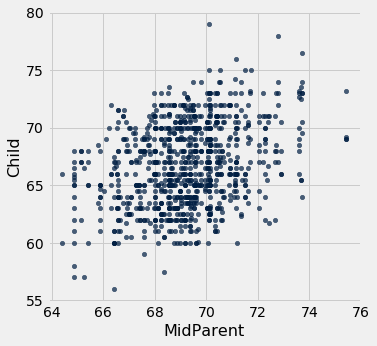

In [9]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights.scatter(0)

In [11]:
galton.row(0)

Row(family='1', father=78.5, mother=67.0, midparentHeight=75.430000000000007, children=4, childNum=1, gender='male', childHeight=73.200000000000003)

In [12]:
galton.row(0).item(1)

78.5

In [13]:
galton.row(0).item('father')

78.5

In [15]:
len(galton.row(0))

8

In [17]:
first = galton.row(0)
first

Row(family='1', father=78.5, mother=67.0, midparentHeight=75.430000000000007, children=4, childNum=1, gender='male', childHeight=73.200000000000003)

In [19]:
m = first.item('mother')
f = first.item('father')
(1.08 * m + f) / 2

75.430000000000007

In [21]:
m = galton.row(4).item('mother')
f = galton.row(4).item('father')
(1.08 * m + f) / 2

73.659999999999997

In [22]:
def mid_parent(m, f):
    return (1.08 * m + f) / 2

In [23]:
mid_parent(galton.row(4).item('mother'), galton.row(4).item('father'))

73.659999999999997

In [ ]:
mid_parent(75.5, 66.5)

In [28]:
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [27]:
galton.take(np.arange(10)).apply(mid_parent, 'mother', 'father')

array([ 75.43,  75.43,  75.43,  75.43,  73.66,  73.66,  73.66,  73.66,
        72.06,  72.06])

## Group

In [13]:
all_cones = Table.read_table('http://inferentialthinking.com/notebooks/cones.csv')
cones = all_cones.drop('Color').exclude(5)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [31]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [32]:
cones.group('Flavor', sum)

Flavor,Price sum
chocolate,15.25
strawberry,8.8


In [35]:
cones.with_column('Sugar', make_array('sam', 'sam', 'no', 'no', 'no')).group('Flavor', sum)

Flavor,Price sum,Sugar sum
chocolate,15.25,
strawberry,8.8,


In [38]:
cones.where('Flavor', 'chocolate').column('Price').sum()

15.25

In [39]:
cones.where('Flavor', 'strawberry').column('Price').sum()

8.8000000000000007

In [41]:
cones.group('Flavor', max)

Flavor,Price max
chocolate,5.25
strawberry,5.25


In [42]:
cones.group('Flavor', np.mean)

Flavor,Price mean
chocolate,5.08333
strawberry,4.4


In [2]:
nba = Table.read_table('http://inferentialthinking.com/notebooks/nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [3]:
nba.select('TEAM', 'SALARY').group('TEAM', sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


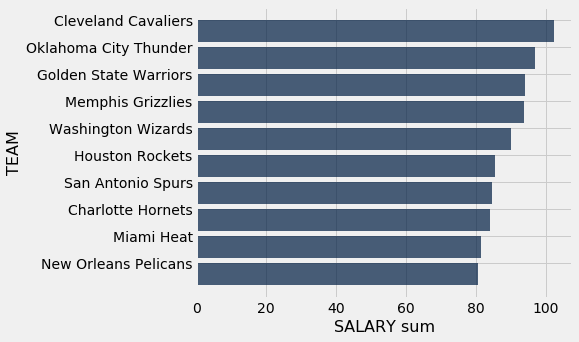

In [6]:
(nba.select('TEAM', 'SALARY')
 .group('TEAM', sum)
 .sort(1, descending=True)
 .take(np.arange(10))
 .barh('TEAM'))

In [10]:
nba.group('POSITION', np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


## Group, Mulitple Columns

In [14]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [16]:
all_cones.group(make_array('Flavor', 'Color'))

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [17]:
all_cones.group(make_array('Flavor', 'Color'), sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [18]:
all_cones.group(make_array('Flavor', 'Color'), np.mean)

Flavor,Color,Price mean
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,4.4


In [23]:
starters = nba.select('TEAM', 'POSITION', 'SALARY').group(make_array('TEAM', 'POSITION'), max)
starters

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


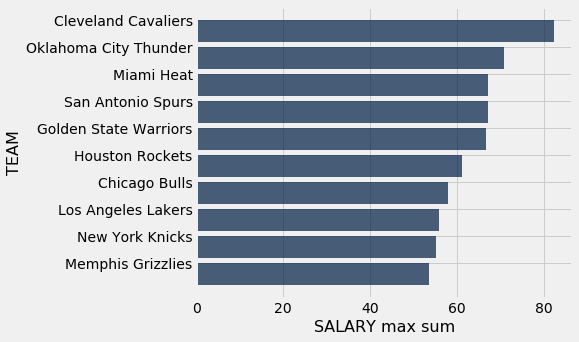

In [29]:
(starters.drop('POSITION')
 .group('TEAM', sum)
 .sort(1, descending=True)
 .take(np.arange(10))
 .barh('TEAM'))

## Pivot

In [30]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [31]:
all_cones.group(make_array('Flavor', 'Color'))

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [32]:
all_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [33]:
all_cones.group(make_array('Flavor', 'Color'), sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [37]:
all_cones.pivot('Flavor', 'Color', values='Price', collect=sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


In [41]:
nba.pivot('POSITION', 'TEAM', values='SALARY', collect=sum)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,22.7563,22.005,9.7634,6,9.04846
Boston Celtics,7.3514,6.17096,19.8986,8.83432,8.03022
Brooklyn Nets,1.3629,13.3575,7.8,26.0806,8.70589
Charlotte Hornets,20.3167,14.0573,17.9412,7.53284,24.2543
Chicago Bulls,20.8488,6.93489,22.3431,3.91632,24.7779
Cleveland Cavaliers,31.0094,19.689,19.6548,22.9705,8.98876
Dallas Mavericks,6.47096,23.827,17.6727,15.3615,2.43035
Denver Nuggets,10.4652,14.05,7.44724,28.7831,1.6839
Detroit Pistons,12.2721,0,13.913,6.86486,9.16176
Golden State Warriors,19.6237,21.5591,16.9145,17.9868,18.001


In [5]:
full_table = Table.read_table('http://inferentialthinking.com/notebooks/educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17')).drop('Year')
ca_2014

Age,Gender,Educational Attainment,Personal Income,Population Count
18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459
